## Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')

---

# Khám phá dữ liệu

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,24,male,23.655,0,no,northwest,2352.96845
1,28,female,26.510,2,no,southeast,4340.44090
2,51,male,39.700,1,no,southwest,9391.34600
3,47,male,36.080,1,yes,southeast,42211.13820
4,46,female,28.900,2,no,southwest,8823.27900


In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
df.shape

(1003, 7)

In [6]:
df.describe(include ="object")

,sex,smoker,region
count,1003,1003,1003
unique,2,2,4
top,male,no,southeast
freq,506,797,259


In [7]:
df.describe()

,age,bmi,children,charges
count,1003.000000,1003.000000,1003.000000,1003.000000
mean,39.255234,30.511780,1.104686,13267.935817
std,14.039105,6.013107,1.204619,12051.356547
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.210000,0.000000,4780.839400
50%,39.000000,30.200000,1.000000,9447.382400
75%,51.000000,34.430000,2.000000,16840.667970
max,64.000000,53.130000,5.000000,62592.873090


In [8]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

---

# Phân tích dữ liệu

### 1. Phân bố các trường dữ liệu

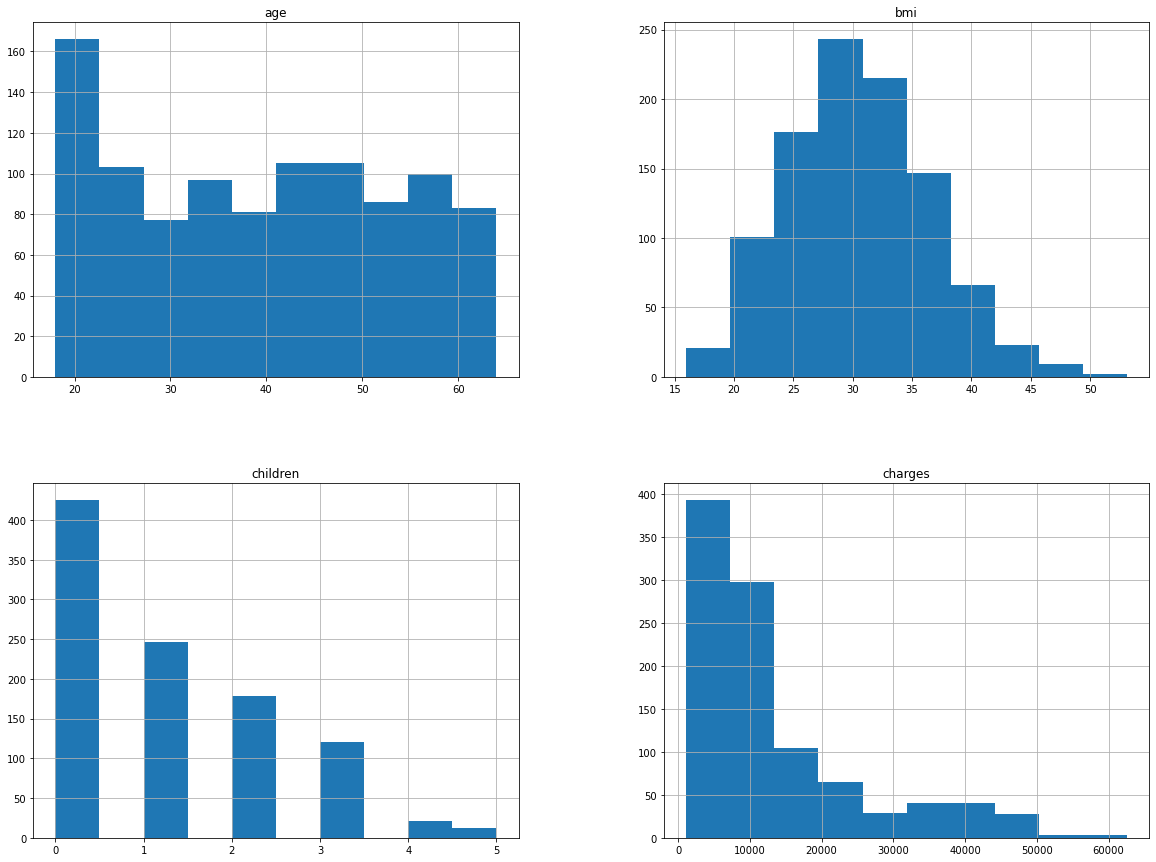

In [9]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

<BarContainer object of 4 artists>

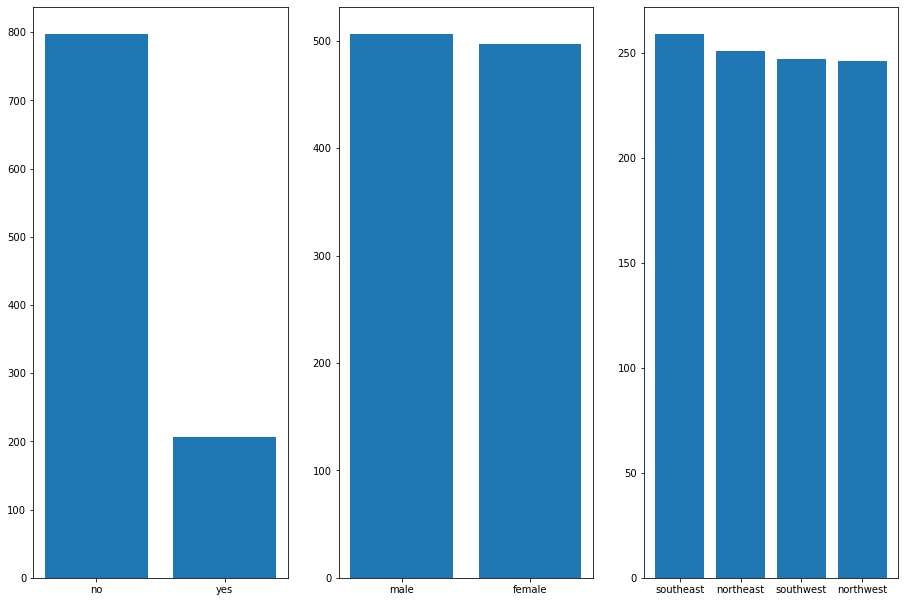

In [10]:
fig , axes = plt.subplots(1,3)
fig.set_size_inches(15.5, 10.5)
smoker_value_counts = df['smoker'].value_counts()
axes[0].bar(smoker_value_counts.index.tolist(), smoker_value_counts)
sex_value_counts = df['sex'].value_counts()
axes[1].bar(sex_value_counts.index.tolist(), sex_value_counts)
region_value_counts = df['region'].value_counts()
axes[2].bar(region_value_counts.index.tolist(), region_value_counts)

### 2. Mối tương quan giữa các trường dữ liệu.

#### Mối tương quan giữa các thuộc tính dạng Numerical

<AxesSubplot:>

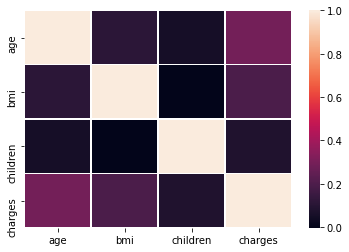

In [11]:
sns.heatmap(df.corr(), linewidths=.5)

<AxesSubplot:xlabel='age', ylabel='charges'>

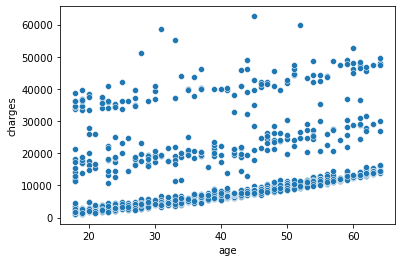

In [12]:
sns.scatterplot(x=df['age'],y = df['charges'])

<AxesSubplot:xlabel='age', ylabel='charges'>

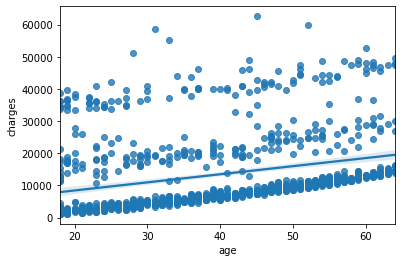

In [13]:
sns.regplot(x=df['age'],y=df['charges'])

Nhận xét: Ta thấy khi độ tuổi càng tăng thì chi phí y tế cũng tăng theo.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

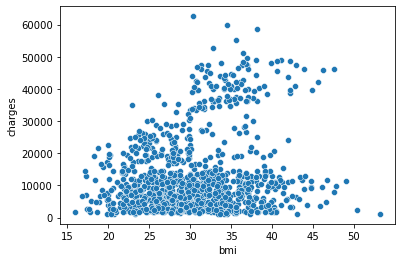

In [14]:
sns.scatterplot(x=df['bmi'],y = df['charges'])

<AxesSubplot:xlabel='bmi', ylabel='charges'>

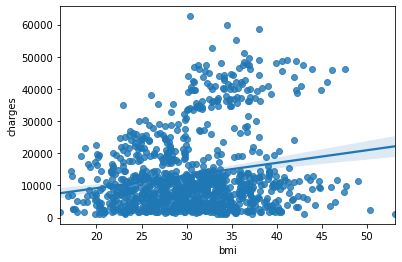

In [15]:
sns.regplot(x=df['bmi'],y=df['charges'])

Nhận xét: 
- Khi chi số BMI tăng thì chi phí y tế cũng tăng theo.
- Mối tương quan này mạnh hơn mối tương quan giữa `age` và `charges` vì đường hồi quy tuyến tính dốc hơn.

<AxesSubplot:xlabel='children', ylabel='charges'>

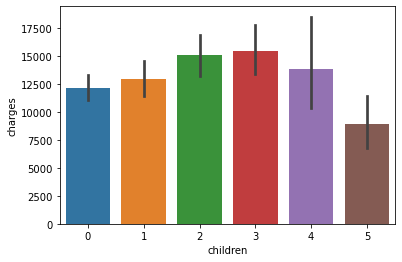

In [16]:
sns.barplot(x=df['children'],y = df['charges'])

Nhận xét: Ở những người có 2 - 3 con có chi phế y tế cao hơn.


#### Mối tương quan giữa các thuộc tính Catergorical

<AxesSubplot:xlabel='smoker', ylabel='charges'>

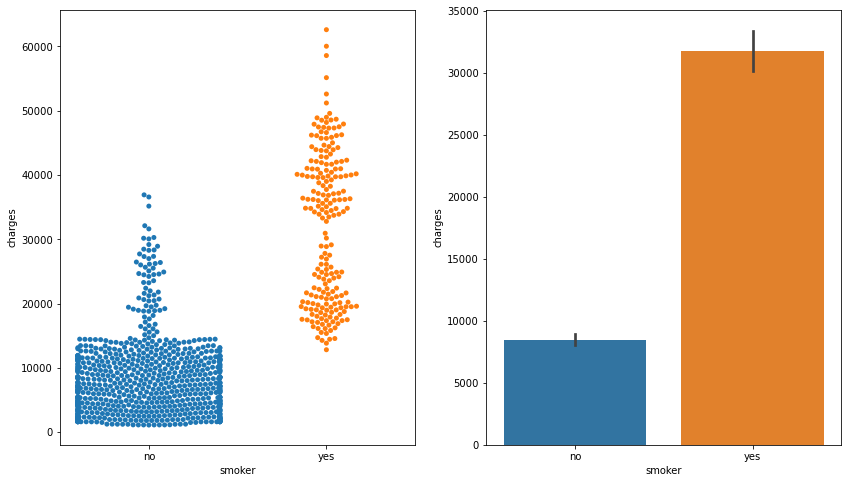

In [17]:
fig , axes = plt.subplots(1,2)
fig.set_size_inches(14, 8)
#
sns.swarmplot(ax=axes[0],x=df['smoker'],y = df['charges'])
sns.barplot(ax = axes[1],x=df['smoker'],y = df['charges'])
# ax = fig.add_subplot(122)

Nhận xét:
- Những người hút thuốc sẽ có chi phí y tế cao hơn những người không hút thuốc.
- Nhìn biểu đồ bên phải ta có thể thấy độ chênh lệch này là rất nhiều (khoảng hơn 20000)

<AxesSubplot:xlabel='region', ylabel='charges'>

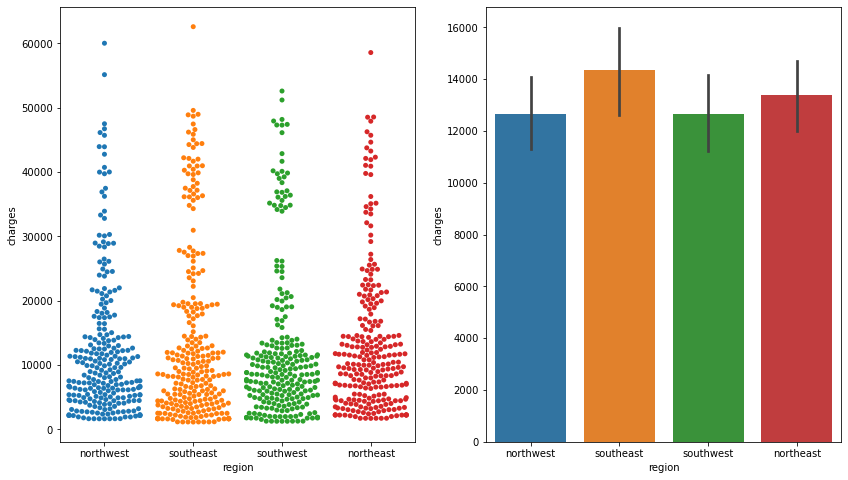

In [18]:
fig , axes = plt.subplots(1,2)
fig.set_size_inches(14, 8)
#
sns.swarmplot(ax=axes[0],x=df['region'],y = df['charges'])
sns.barplot(ax = axes[1],x=df['region'],y = df['charges'])

Nhận xét:
- Những người ở vùng Đông Nam sẽ có chi phí y tế cao hơn tuy không nhiều.
- Độ chênh lệch giữa các vùng với nhau không nhiều. 

<AxesSubplot:xlabel='sex', ylabel='charges'>

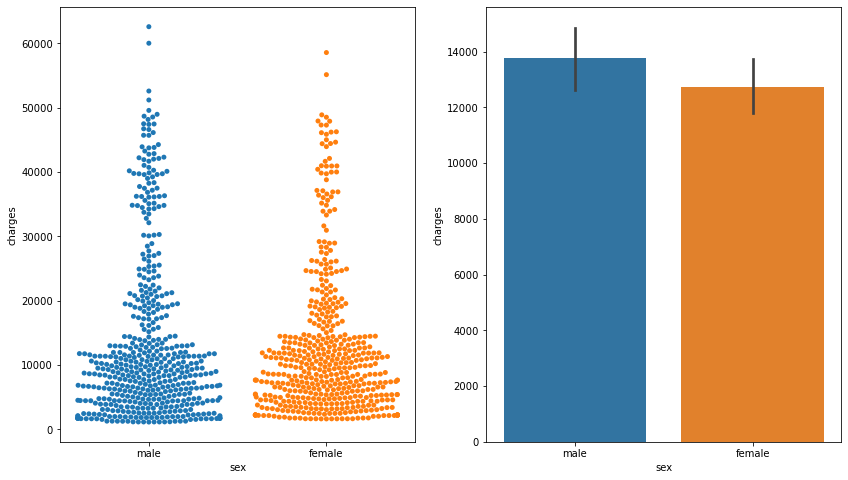

In [19]:
fig , axes = plt.subplots(1,2)
fig.set_size_inches(14, 8)
#
sns.swarmplot(ax=axes[0], x=df['sex'],y = df['charges'] )
sns.barplot(ax=axes[1], x=df['sex'],y = df['charges'])

Nhận xét:
- Những người nam sẽ có chi phí y tế cao hơn tuy không nhiều.
- Độ chênh lệch chi phí y tế giữa giới tính không nhiều. 

### 3. Xét các điểm dữ liệu nhiễu

<AxesSubplot:>

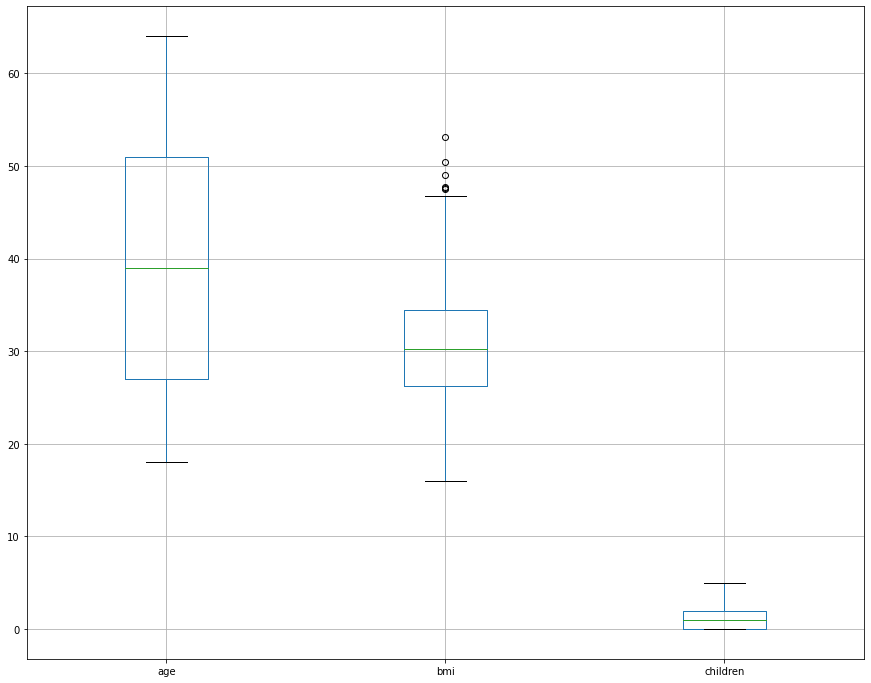

In [20]:
temp_df = df.drop("charges", axis=1)
temp_df.boxplot(figsize=(15, 12))

- Ở cột `bmi` có giá trị nhiễu

In [21]:
q1,q2,q3 = temp_df['bmi'].quantile([0.25,0.5,0.75])
IQR = q3 - q1
upper_limit = q3 + 1.5*IQR
upper_limit

46.76

Nhận xét: Ở cột `bmi` những giá trị lớn hơn 46.76 là dữ liệu nhiễu. Ta cần tiền xử lý.

---

# Tiền xử lý dữ liệu

In [22]:
y_sr = df["charges"] # sr là viết tắt của series
X_df = df.drop("charges", axis=1)

- Ta nhận thấy `region` và `sex` không có độ chênh lệch về chi phí y tế. Do đó, nó sẽ không ảnh hưởng nhiều đến chi phí y tế. Vì vậy, ta sẽ xóa bỏ 2 cột `region` và `sex`

In [23]:
X_df = X_df.drop(["sex","region"],axis=1)
X_df

,age,bmi,children,smoker
0,24,23.655,0,no
1,28,26.510,2,no
2,51,39.700,1,no
3,47,36.080,1,yes
4,46,28.900,2,no
...,...,...,...,...
998,18,31.350,4,no
999,39,23.870,5,no
1000,58,25.175,0,no
1001,37,47.600,2,yes


In [24]:
y_sr

0        2352.96845
1        4340.44090
2        9391.34600
3       42211.13820
4        8823.27900
           ...     
998      4561.18850
999      8582.30230
1000    11931.12525
1001    46113.51100
1002    10214.63600
Name: charges, Length: 1003, dtype: float64

- Thay thế những giá trị nhiễu (lớn hơn upper_limit) ở cột `bmi` bằng giá trị mean của cột.

In [25]:
X_df[X_df["bmi"]>upper_limit] = X_df["bmi"].mean()

In [26]:
X_df["smoker"] = X_df["smoker"].astype(str)

In [27]:
one_hot_encoder = OneHotEncoder()
standar_scaler = StandardScaler()
cols_numerical = ['age', 'bmi', 'children']
cols_categorical = ["smoker"]

column_trans =  ColumnTransformer([('cols_numerical', standar_scaler, cols_numerical),
                                   ('cols_categorical', one_hot_encoder, cols_categorical)])

---

# Mô hình hóa dữ liệu

- Linear Regression

In [28]:
linear_regression = LinearRegression()
linear_pipeline = Pipeline([('column_trans', column_trans),
                            ('linear_regression', linear_regression)])
linear_pipeline.fit(X_df, y_sr)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('cols_numerical',
                                                  StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cols_categorical',
                                                  OneHotEncoder(),
                                                  ['smoker'])])),
                ('linear_regression', LinearRegression())])

In [29]:
linear_pipeline.named_steps['linear_regression'].intercept_

14565.287850051554

In [30]:
linear_pipeline.named_steps['linear_regression'].coef_[0]

3627.980139211079

In [31]:
def compute_mse(y, preds):
        return ((y - preds) ** 2).mean()
def compute_rr(y, preds, baseline_preds):
    return 1 - compute_mse(y, preds) / compute_mse(y, baseline_preds)
baseline_preds = y_sr.mean()
print(f"Score: {compute_rr(y_sr, linear_pipeline.predict(X_df), baseline_preds)}")

Score: 0.7374374194685254


- Neural Network

In [32]:
train_X_df, val_X_df, train_y_sr, val_y_sr = train_test_split(X_df, y_sr, test_size=0.3, random_state=0)

In [ ]:
regr = MLPRegressor(random_state=1, max_iter=2500, hidden_layer_sizes =(100,), solver = "lbfgs")
mlp_regressor_pipeline = Pipeline([('column_trans',column_trans),
                          ('MLPRegressor',regr)])

train_errs = []
val_errs = []
alphas = [0.01, 0.1, 1]
hidden_layer_sizes = [(100,),(100,2), (80,), (80,2)]
best_val_err = float('inf'); best_alpha = None; best_hidden_layer_sizes = None
for alpha in alphas:
    for hidden_layer_size in hidden_layer_sizes:
        mlp_regressor_pipeline.set_params(MLPRegressor__hidden_layer_sizes = hidden_layer_size, 
                                          MLPRegressor__alpha = alpha)
        mlp_regressor_pipeline.fit(train_X_df, train_y_sr)
        train_score = (1 - mlp_regressor_pipeline.score(train_X_df, train_y_sr))*100
        val_score = (1 - mlp_regressor_pipeline.score(val_X_df, val_y_sr))*100
        train_errs.append(train_score)
        val_errs.append(val_score)
        if float(val_score) < best_val_err:
            best_val_err = val_score
            best_alpha = alpha
            best_hidden_layer_sizes = hidden_layer_size

In [ ]:
# Trực quan hóa kết quả
train_errs_df = pd.DataFrame(data=np.array(train_errs).reshape(len(alphas), -1),
                             index=alphas, columns=hidden_layer_sizes)
val_errs_df = pd.DataFrame(data=np.array(val_errs).reshape(len(alphas), -1), 
                           index=alphas, columns=hidden_layer_sizes)
min_err = min(min(train_errs), min(val_errs))
max_err = max(max(train_errs), max(val_errs))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('train errors'); plt.xlabel('hidden_layer_sizes'); plt.ylabel('alpha')
plt.subplot(1, 2, 2)
sns.heatmap(val_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('validation errors'); plt.xlabel('hidden_layer_sizes'); plt.ylabel('alpha');

In [ ]:
mlp_regressor_pipeline.set_params(MLPRegressor__hidden_layer_sizes = best_hidden_layer_sizes, 
                                  MLPRegressor__alpha = best_alpha)
mlp_regressor_pipeline.fit(X_df, y_sr)

In [ ]:
print(f"Score: {mlp_regressor_pipeline.score(X_df, y_sr)}")

---

# Test mô hình vừa huấn luyện

In [ ]:
df_test = pd.read_csv("test.csv")

In [ ]:
df_test.head()

In [ ]:
test_y = df_test["charges"]
test_X = df_test.drop("charges", axis=1)
test_X = test_X.drop(["sex","region"],axis=1)

- Linear Regression

In [ ]:
baseline_preds = test_y.mean()
preprocessing_test_X = column_trans.transform(test_X)
print(f"Score: {compute_rr(test_y, linear_pipeline.predict(test_X), baseline_preds)}")

- Neural network

In [ ]:
print(f"Score: {mlp_regressor_pipeline.score(test_X, test_y)}")